In [14]:
import cv2
import matplotlib.pyplot as plt

In [15]:
# img import 및 그레이스케일 화
img = cv2.imread('img/scanfile.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [16]:
# 색상 반전
invert = img.copy()
invert = 255 - invert
invert.size

3855085

In [17]:
# cv2.imshow("2", invert)
# cv2.waitKey(500)
# cv2.destroyAllWindows()

In [18]:
# 가우시안 블러 적용
blurred = cv2.GaussianBlur(invert, (5, 5), 0)


In [19]:
# cv2.imshow("2", blurred)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [20]:
# 임계값 지정
ret, thresh = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)


In [21]:
images, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    cv2.drawContours(images, [contours[i]], 0, (0, 0, 255), 2)

cv2.destroyAllWindows()

largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

print(x, y, w, h)

cv2.putText(images, "BIG AREA", (x, y), cv2.FONT_ITALIC, 10, (255, 255, 0), 2)
cv2.rectangle(images, (x, y), (x + w, y + h), (255, 255, 0), 3)

106 544 1414 1116


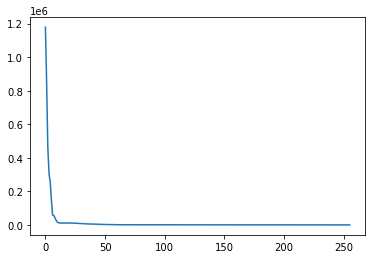

In [24]:
hist1 = cv2.calcHist(images=[invert], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist1)

In [25]:
cv2.imshow("area", images)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
cv2.imshow("test", images)
cv2.waitKey(0)
cv2.destroyAllWindows()